In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter

In [2]:
# Load data
# Save all csv files names
all_df_name = pd.Series(os.listdir("/Users/faezehmirlohi/Desktop/UCSF/Assignments/Fall/DATASCI217/Assignment7/07-visualization-FaezehMirlohi/ddf--datapoints--population--by--country--age--gender--year/"))

# Extract country names from file names
country = all_df_name.str.extract(r"country-([\w]+)--age")
country.columns = ["country_name"]

# Save all csv paths 
country['file_path'] = "/Users/faezehmirlohi/Desktop/UCSF/Assignments/Fall/DATASCI217/Assignment7/07-visualization-FaezehMirlohi/ddf--datapoints--population--by--country--age--gender--year/" + all_df_name.values

# data (dict) = {country_name (key): file_path (value)}
data = {row['country_name']: pd.read_csv(row['file_path']) for _, row in country.iterrows()}

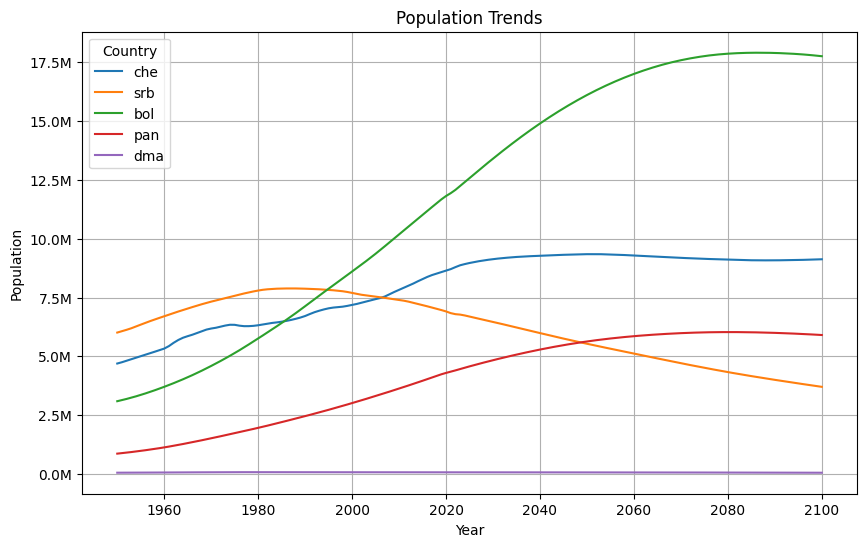

In [3]:
# Part 1.1

# Colormap
colors = cm.tab10.colors

# Set figure size 
plt.figure(figsize=(10, 6))

# Define millions function to display y axis unit better
def millions(x, pos):
    # Devide the value by 1,000,000 and show only 1 decimal
    # Add the "M" suffix to indicate millions
    return f'{x * 1e-6:.1f}M' 

# Lineplot
for i, cty in enumerate(country.loc[0:4, "country_name"]):

    # Total population by each year
    yearly_total = data[cty].groupby('year')['population'].sum()

    # Lineplot of population trends of all 5 countries
    plt.plot(yearly_total.index, yearly_total, linestyle = '-', label=cty, 
             color = colors[i % len(colors)])

# Plot design    
plt.legend(title="Country")
plt.grid()
plt.title('Population Trends')
plt.xlabel('Year')
plt.ylabel('Population')
# Custume format the y axis tick values
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))
# Display plot
plt.show()

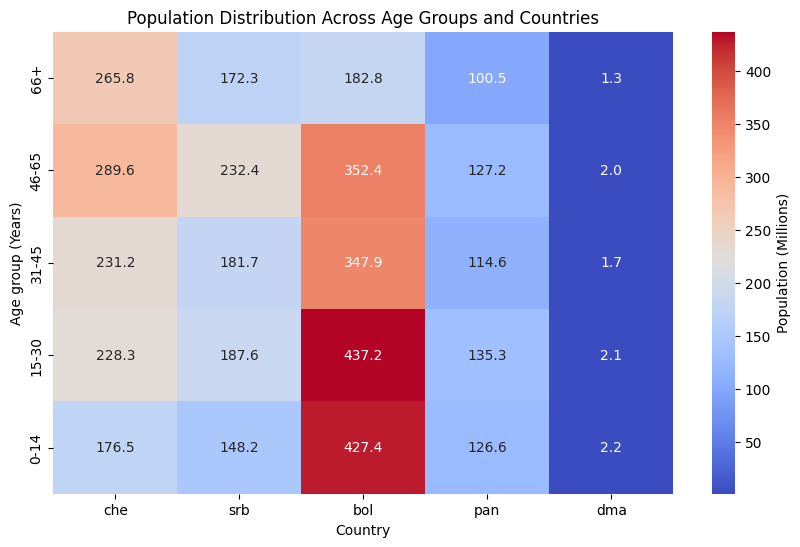

In [4]:
# Part 2.1

# Set figure size 
plt.figure(figsize=(10, 6))

# Define age groups
age_bins = [0, 14, 30, 45, 65, 200]
age_labels = ['0-14', '15-30', '31-45', '46-65', '66+']

# Dictionary with age groups population of all 5 countries 
population_distribution = {}

for cty in country.loc[0:4, "country_name"]:
    # Bin the age by groups and save in a new column
    data[cty]['age_group'] = pd.cut(data[cty]['age'], bins = age_bins, labels = age_labels, right = True)

    # Populstion of each age group
    age_group_population = data[cty].groupby('age_group', observed=True)['population'].sum()
    population_distribution[cty] = age_group_population

# Convert the dictionary to dataframe to pass it to the heatmap
population_df = pd.DataFrame(population_distribution)

# Heatmap of population across age groups and countries 
sns.heatmap(population_df.iloc[::-1]/1e6, annot=True, fmt=".1f", cmap='coolwarm', cbar_kws={'label': 'Population (Millions)'})

# Plot design
plt.title('Population Distribution Across Age Groups and Countries')
plt.xlabel('Country')
plt.ylabel('Age group (Years)')

# Display
plt.show()

***Population Heatmap Across Age Groups and 5 Countires***

- The plot shows that 'dma' and 'pan' countries have a similar population distribution among all age groups.
- While the majority of 'bol' country population seems to be young (population decreases by age), the mojarity of 'che' seems to be of older ages (population increases by age).